## Problem Statement:
In recent years, the wealth management industry has seen significant growth. Individuals and businesses constantly seek opportunities to maximize their returns. However, many lack the skills or time to identify the right investment opportunities, which has led to the rise of portfolio managers. These professionals make investment decisions on behalf of investors for a commission. Their main role is to align investment strategies with the clients' financial goals, but they face stiff competition from other managers and firms.

Data Analysis Requirement:
Your task is to perform a data-driven analysis to support a portfolio manager working for an investment firm managing private clients’ accounts. Your analysis should help to provide investment management advice based on the clients' financial objectives and risk profiles.

### Business Requirements:
Client 1: Mr. James 

- Objective: Suggest a portfolio of stocks to help Mr. Patrick Jyenger double his initial investment of $500,000 over the next three years.
- Risk Profile: Moderate risk tolerance, willing to take calculated risks but prefers a balanced portfolio of stable and growth stocks.
- Goal: Use the returns to buy a minority stake in Naturo, a growing business.


In [1]:
#Importing the necessary Libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#suppressing warnings:

import warnings
warnings.filterwarnings('ignore')

#MinMax Scaler:
from sklearn.preprocessing import MinMaxScaler

#setting the jupyter view:

pd.options.display.max_columns = None
pd.options.display.max_rows = None

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import yfinance as yf

# Define a list of tech stock tickers, replacing FB with META
tech_stocks = ["AAPL", "AMZN", "META", "GOOG", "IBM", "MSFT"]

# Download the stock data for the tech stocks for a specific date range
tech_stock_data = yf.download(tech_stocks, start="2020-01-01", end="2024-01-01")

# Save individual tech stocks as CSV (optional)
for ticker in tech_stocks:
    data = yf.download(ticker, start="2020-01-01", end="2024-01-01")
    data.to_csv(f"{ticker}.csv")


[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
import pandas as pd

# Reading tech stock datasets
Apple = pd.read_csv("AAPL.csv")
Amazon = pd.read_csv("AMZN.csv")
Meta = pd.read_csv("META.csv")  # Replacing Facebook with Meta
Google = pd.read_csv("GOOG.csv")
IBM = pd.read_csv("IBM.csv")
Microsoft = pd.read_csv("MSFT.csv")

# Optionally, you can print the first few rows of each dataset to confirm they've loaded correctly
print(Apple.head())
print(Amazon.head())
print(Meta.head())
print(Google.head())
print(IBM.head())
print(Microsoft.head())


         Date       Open       High        Low      Close  Adj Close  \
0  2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876114   
1  2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167603   
2  2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742653   
3  2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400551   
4  2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565208   

      Volume  
0  135480400  
1  146322800  
2  118387200  
3  108872000  
4  132079200  
         Date       Open       High        Low      Close  Adj Close    Volume
0  2020-01-02  93.750000  94.900497  93.207497  94.900497  94.900497  80580000
1  2020-01-03  93.224998  94.309998  93.224998  93.748497  93.748497  75288000
2  2020-01-06  93.000000  95.184502  93.000000  95.143997  95.143997  81236000
3  2020-01-07  95.224998  95.694504  94.601997  95.343002  95.343002  80898000
4  2020-01-08  94.902000  95.550003  94.321999  94.598503  94.598503  70160000
   

In [5]:
Apple = Apple.rename(columns={
    'Open': 'AAPL_Open', 
    'High': 'AAPL_High', 
    'Low': 'AAPL_Low', 
    'Close': 'AAPL', 
    'Adj Close': 'AAPL_Adj Close', 
    'Volume': 'AAPL_Volume'
}, inplace=False)

Amazon = Amazon.rename(columns={
    'Open': 'AMZN_Open', 
    'High': 'AMZN_High', 
    'Low': 'AMZN_Low', 
    'Close': 'AMZN', 
    'Adj Close': 'AMZN_Adj Close', 
    'Volume': 'AMZN_Volume'
}, inplace=False)

Meta = Meta.rename(columns={
    'Open': 'META_Open', 
    'High': 'META_High', 
    'Low': 'META_Low', 
    'Close': 'META', 
    'Adj Close': 'META_Adj Close', 
    'Volume': 'META_Volume'
}, inplace=False)

Google = Google.rename(columns={
    'Open': 'GOOG_Open', 
    'High': 'GOOG_High', 
    'Low': 'GOOG_Low', 
    'Close': 'GOOG', 
    'Adj Close': 'GOOG_Adj Close', 
    'Volume': 'GOOG_Volume'
}, inplace=False)

IBM = IBM.rename(columns={
    'Open': 'IBM_Open', 
    'High': 'IBM_High', 
    'Low': 'IBM_Low', 
    'Close': 'IBM', 
    'Adj Close': 'IBM_Adj Close', 
    'Volume': 'IBM_Volume'
}, inplace=False)

Microsoft = Microsoft.rename(columns={
    'Open': 'MSFT_Open', 
    'High': 'MSFT_High', 
    'Low': 'MSFT_Low', 
    'Close': 'MSFT', 
    'Adj Close': 'MSFT_Adj Close', 
    'Volume': 'MSFT_Volume'
}, inplace=False)


In [6]:
#Now we will be taking two similar columns from the stocks dataset

AAPL_data = Apple[['Date', 'AAPL']]
AMZN_data = Amazon[['Date', 'AMZN']]
META_data = Meta[['Date', 'META']]
GOOG_data = Google[['Date', 'GOOG']]
IBM_data = IBM[['Date', 'IBM']]
MSFT_data = Microsoft[['Date', 'MSFT']]

In [7]:
stocks = AAPL_data
stocks = pd.merge(stocks, AMZN_data, how='inner', on='Date')
stocks = pd.merge(stocks, META_data, how='inner', on='Date')
stocks = pd.merge(stocks, GOOG_data, how='inner', on='Date')
stocks = pd.merge(stocks, IBM_data, how='inner', on='Date')
stocks = pd.merge(stocks, MSFT_data, how='inner', on='Date')

In [8]:
stocks.head(10)

,Date,AAPL,AMZN,META,GOOG,IBM,MSFT
0,2020-01-02,75.087502,94.900497,209.779999,68.368500,129.464630,160.619995
1,2020-01-03,74.357498,93.748497,208.669998,68.032997,128.432129,158.619995
2,2020-01-06,74.949997,95.143997,212.600006,69.710503,128.202682,159.029999
3,2020-01-07,74.597504,95.343002,213.059998,69.667000,128.288712,157.580002
4,2020-01-08,75.797501,94.598503,215.220001,70.216003,129.359467,160.089996
5,2020-01-09,77.407501,95.052498,218.300003,70.991501,130.726578,162.089996
6,2020-01-10,77.582497,94.157997,218.059998,71.486504,130.678772,161.339996
7,2020-01-13,79.239998,94.565002,221.910004,71.961502,130.592728,163.279999
8,2020-01-14,78.169998,93.472000,219.059998,71.543999,129.847031,162.130005
9,2020-01-15,77.834999,93.100998,221.149994,71.959999,130.611862,163.179993


In [9]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1006 non-null   object 
 1   AAPL    1006 non-null   float64
 2   AMZN    1006 non-null   float64
 3   META    1006 non-null   float64
 4   GOOG    1006 non-null   float64
 5   IBM     1006 non-null   float64
 6   MSFT    1006 non-null   float64
dtypes: float64(6), object(1)
memory usage: 55.1+ KB


In [10]:
stocks.isnull().sum()

Date    0
AAPL    0
AMZN    0
META    0
GOOG    0
IBM     0
MSFT    0
dtype: int64

In [11]:
stocks.describe()

,AAPL,AMZN,META,GOOG,IBM,MSFT
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,140.808131,137.216247,249.362267,108.538847,130.128729,262.781928
std,33.313857,27.468805,71.002682,25.434896,11.824895,54.621965
min,56.092499,81.820000,88.910004,52.831001,90.602295,135.419998
25%,123.592501,114.309002,193.564995,88.279001,120.748089,221.469994
50%,145.860001,140.585007,259.915009,110.647751,130.620934,259.464996
75%,166.214996,161.190620,310.547508,131.457504,137.819874,304.322487
max,198.110001,186.570496,382.179993,150.709000,164.710007,382.700012


In [12]:
stocks.head()

,Date,AAPL,AMZN,META,GOOG,IBM,MSFT
0,2020-01-02,75.087502,94.900497,209.779999,68.368500,129.464630,160.619995
1,2020-01-03,74.357498,93.748497,208.669998,68.032997,128.432129,158.619995
2,2020-01-06,74.949997,95.143997,212.600006,69.710503,128.202682,159.029999
3,2020-01-07,74.597504,95.343002,213.059998,69.667000,128.288712,157.580002
4,2020-01-08,75.797501,94.598503,215.220001,70.216003,129.359467,160.089996


In [13]:
stocks.shape

(1006, 7)

In [14]:
stocks.dtypes

Date     object
AAPL    float64
AMZN    float64
META    float64
GOOG    float64
IBM     float64
MSFT    float64
dtype: object

In [16]:
# Change the date column to datetime format
stocks["Date"] = pd.to_datetime(stocks["Date"], format='%Y-%m-%d')

# Display data types of the columns in the DataFrame
data_types = stocks.dtypes
print(data_types)


Date    datetime64[ns]
AAPL           float64
AMZN           float64
META           float64
GOOG           float64
IBM            float64
MSFT           float64
dtype: object


In [17]:
stocks = stocks.set_index('Date')


stocks.head()

,AAPL,AMZN,META,GOOG,IBM,MSFT
Date,,,,,,
2020-01-02,75.087502,94.900497,209.779999,68.368500,129.464630,160.619995
2020-01-03,74.357498,93.748497,208.669998,68.032997,128.432129,158.619995
2020-01-06,74.949997,95.143997,212.600006,69.710503,128.202682,159.029999
2020-01-07,74.597504,95.343002,213.059998,69.667000,128.288712,157.580002
2020-01-08,75.797501,94.598503,215.220001,70.216003,129.359467,160.089996


In [18]:
#Column wise Null Value calculation:

# Column wise null values in train data set 
null_percent = pd.DataFrame(round((stocks.isnull().sum())*100/stocks.shape[0],2)).reset_index()
null_percent.columns = ['Column Name', 'Null Values Percentage']
null_score = pd.DataFrame(stocks.isnull().sum()).reset_index()
null_score.columns = ['Column Name', 'Null Values']
null_stocks = pd.merge(null_score, null_percent, on='Column Name')
null_stocks.sort_values("Null Values", ascending = False)

,Column Name,Null Values,Null Values Percentage
0,AAPL,0,0.0
1,AMZN,0,0.0
2,META,0,0.0
3,GOOG,0,0.0
4,IBM,0,0.0
5,MSFT,0,0.0


In [19]:
original_stocks = stocks.copy()

original_stocks.head()

,AAPL,AMZN,META,GOOG,IBM,MSFT
Date,,,,,,
2020-01-02,75.087502,94.900497,209.779999,68.368500,129.464630,160.619995
2020-01-03,74.357498,93.748497,208.669998,68.032997,128.432129,158.619995
2020-01-06,74.949997,95.143997,212.600006,69.710503,128.202682,159.029999
2020-01-07,74.597504,95.343002,213.059998,69.667000,128.288712,157.580002
2020-01-08,75.797501,94.598503,215.220001,70.216003,129.359467,160.089996


In [20]:
#Checking the shape of the dataq:

original_stocks.shape

(1006, 6)

In [21]:
stocks.to_csv('Cleaned_data_final.csv')

In [22]:
# lets assign the dataset to Nomalized data to do the normalization
normalized_stocks = stocks.copy()

# Here we are using the Minmax Scaler...The default range for the feature returned by MinMaxScaler is 0 to 1.
scaler = MinMaxScaler()

# here we are calculating the values and appling the values of the parameters on the actual data and gives the normalized value
scaled =scaler.fit_transform(normalized_stocks.iloc[:])

# reassigning the tranformed dataset to Normalized_data
normalized_stocks.iloc[:]=scaled

In [23]:
normalized_stocks.head()


,AAPL,AMZN,META,GOOG,IBM,MSFT
Date,,,,,,
2020-01-02,0.133751,0.124873,0.412146,0.158744,0.524403,0.101909
2020-01-03,0.128611,0.113875,0.408361,0.155316,0.510471,0.093821
2020-01-06,0.132783,0.127197,0.421762,0.172455,0.507375,0.095479
2020-01-07,0.130301,0.129097,0.423330,0.172010,0.508536,0.089615
2020-01-08,0.138751,0.121990,0.430695,0.177619,0.522984,0.099765


In [24]:
normalized_stocks.to_csv('normalized_data.csv')

In [27]:
stocks = stocks['01-01-2020':]

# Display the first few rows of the updated DataFrame
stocks.head()


,AAPL,AMZN,META,GOOG,IBM,MSFT
Date,,,,,,
2020-01-02,75.087502,94.900497,209.779999,68.368500,129.464630,160.619995
2020-01-03,74.357498,93.748497,208.669998,68.032997,128.432129,158.619995
2020-01-06,74.949997,95.143997,212.600006,69.710503,128.202682,159.029999
2020-01-07,74.597504,95.343002,213.059998,69.667000,128.288712,157.580002
2020-01-08,75.797501,94.598503,215.220001,70.216003,129.359467,160.089996


In [28]:
stocks.isnull().sum()

AAPL    0
AMZN    0
META    0
GOOG    0
IBM     0
MSFT    0
dtype: int64

In [29]:
scaler = MinMaxScaler()

# here we are calculating the values and appling the values of the parameters on the actual data and gives the normalized value
scaled =scaler.fit_transform(stocks.iloc[:])

# reassigning the tranformed dataset to Normalized_data
stocks.iloc[:]=scaled

In [30]:
stocks.head()

,AAPL,AMZN,META,GOOG,IBM,MSFT
Date,,,,,,
2020-01-02,0.133751,0.124873,0.412146,0.158744,0.524403,0.101909
2020-01-03,0.128611,0.113875,0.408361,0.155316,0.510471,0.093821
2020-01-06,0.132783,0.127197,0.421762,0.172455,0.507375,0.095479
2020-01-07,0.130301,0.129097,0.423330,0.172010,0.508536,0.089615
2020-01-08,0.138751,0.121990,0.430695,0.177619,0.522984,0.099765


In [32]:
IT_set=stocks[['AAPL','AMZN','META','GOOG','IBM','MSFT']]

IT_set.head()

,AAPL,AMZN,META,GOOG,IBM,MSFT
Date,,,,,,
2020-01-02,0.133751,0.124873,0.412146,0.158744,0.524403,0.101909
2020-01-03,0.128611,0.113875,0.408361,0.155316,0.510471,0.093821
2020-01-06,0.132783,0.127197,0.421762,0.172455,0.507375,0.095479
2020-01-07,0.130301,0.129097,0.423330,0.172010,0.508536,0.089615
2020-01-08,0.138751,0.121990,0.430695,0.177619,0.522984,0.099765


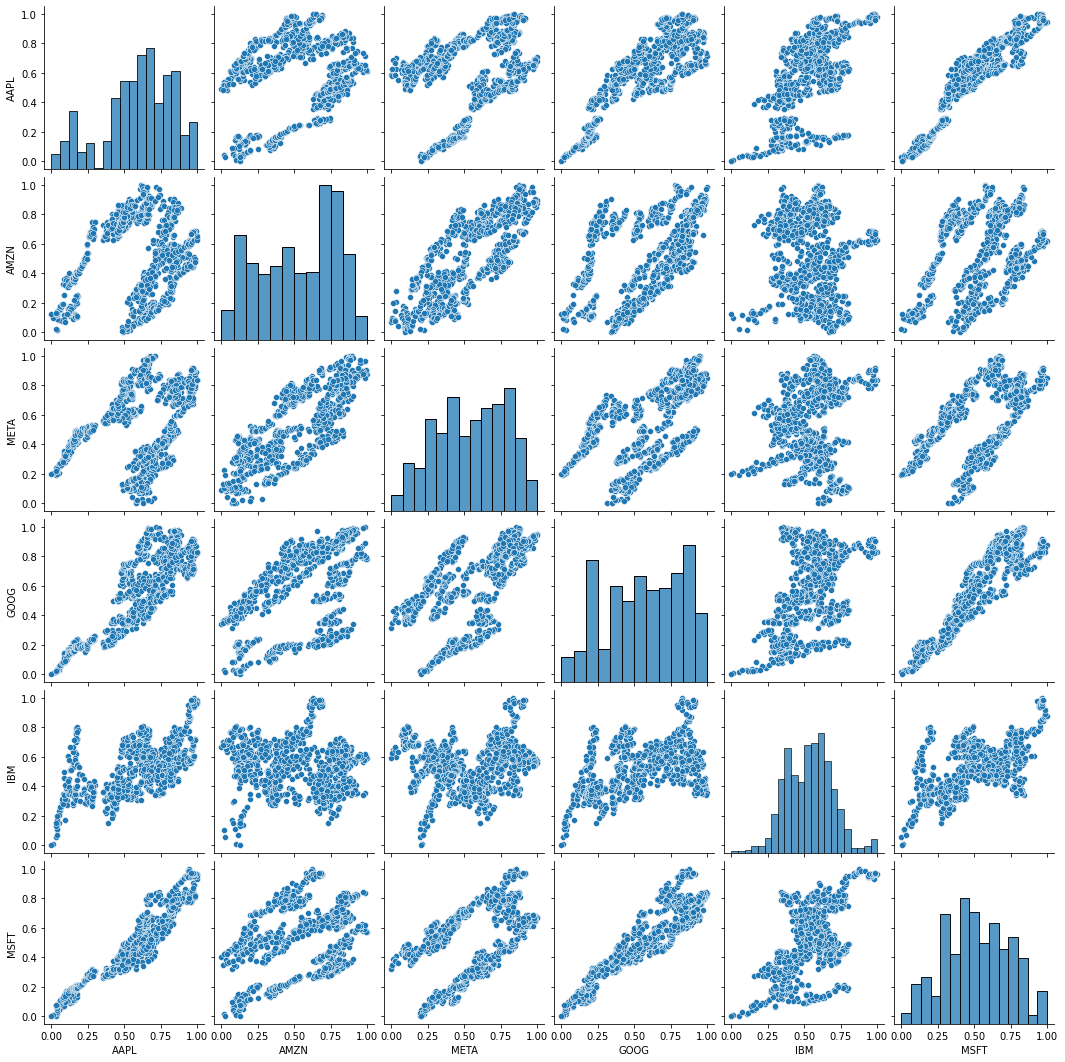

In [33]:
sns.pairplot(IT_set)
plt.ioff()

# Key Metrics 

## DAILY RETURNS

* For calculating the daily returns we will use some formulas and Pandas built in function which is known as pct_change.
* Using this we will be able to calculate the simple returns for each day and each stock.

In [35]:
original_stocks.head()

,AAPL,AMZN,META,GOOG,IBM,MSFT
Date,,,,,,
2020-01-02,75.087502,94.900497,209.779999,68.368500,129.464630,160.619995
2020-01-03,74.357498,93.748497,208.669998,68.032997,128.432129,158.619995
2020-01-06,74.949997,95.143997,212.600006,69.710503,128.202682,159.029999
2020-01-07,74.597504,95.343002,213.059998,69.667000,128.288712,157.580002
2020-01-08,75.797501,94.598503,215.220001,70.216003,129.359467,160.089996


In [36]:
daily_return = original_stocks.copy()

In [37]:
daily_return = daily_return['01-01-2020':]

daily_return.head()

,AAPL,AMZN,META,GOOG,IBM,MSFT
Date,,,,,,
2020-01-02,75.087502,94.900497,209.779999,68.368500,129.464630,160.619995
2020-01-03,74.357498,93.748497,208.669998,68.032997,128.432129,158.619995
2020-01-06,74.949997,95.143997,212.600006,69.710503,128.202682,159.029999
2020-01-07,74.597504,95.343002,213.059998,69.667000,128.288712,157.580002
2020-01-08,75.797501,94.598503,215.220001,70.216003,129.359467,160.089996


In [42]:
# Assuming stock_data is your DataFrame of stock prices
daily_return = daily_return.pct_change().fillna(0)  # Calculate daily returns and fill NaNs with 0

# Now calculate cumulative daily returns
df_cum_daily_return = (1 + daily_return).cumprod() - 1

# Display the last few rows
print(df_cum_daily_return.tail())


                AAPL      AMZN      META      GOOG       IBM      MSFT
Date                                                                  
2023-12-22  1.578325  0.616641  0.684574  1.087511  0.252388  1.332088
2023-12-26  1.571000  0.616535  0.691439  1.088974  0.260653  1.332586
2023-12-27  1.572332  0.615798  0.705739  1.068789  0.262584  1.328913
2023-12-28  1.578059  0.616219  0.708075  1.066449  0.264824  1.336446
2023-12-29  1.564075  0.601045  0.687291  1.061329  0.263279  1.341178


In [43]:
# As we have calculated returns the first row for Returns and CumReturns will be null 
# We will be Deleting the null rows as they are not relevant for our further calculations

daily_return.dropna(axis = 0, inplace = True)
df_cum_daily_return.dropna(axis = 0, inplace = True)

In [44]:
daily_return.head()

,AAPL,AMZN,META,GOOG,IBM,MSFT
Date,,,,,,
2020-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03,-0.009722,-0.012139,-0.005291,-0.004907,-0.007975,-0.012452
2020-01-06,0.007968,0.014886,0.018834,0.024657,-0.001787,0.002585
2020-01-07,-0.004703,0.002092,0.002164,-0.000624,0.000671,-0.009118
2020-01-08,0.016086,-0.007809,0.010138,0.007880,0.008346,0.015928


In [45]:
df_cum_daily_return.tail()

,AAPL,AMZN,META,GOOG,IBM,MSFT
Date,,,,,,
2023-12-22,1.578325,0.616641,0.684574,1.087511,0.252388,1.332088
2023-12-26,1.571000,0.616535,0.691439,1.088974,0.260653,1.332586
2023-12-27,1.572332,0.615798,0.705739,1.068789,0.262584,1.328913
2023-12-28,1.578059,0.616219,0.708075,1.066449,0.264824,1.336446
2023-12-29,1.564075,0.601045,0.687291,1.061329,0.263279,1.341178


In [46]:
#first we will select the last row and assigning it to a new data frame
Cum_daily_return = df_cum_daily_return.iloc[:, :].tail(1)

# rounding off the values by mulitplying with 100
Cum_daily_return = Cum_daily_return * 100

# lets check the dataframe
Cum_daily_return

,AAPL,AMZN,META,GOOG,IBM,MSFT
Date,,,,,,
2023-12-29,156.407518,60.104537,68.729142,106.132931,26.327942,134.117806


In [47]:
# reseting the index
Cum_daily_return = Cum_daily_return.reset_index()

# transposing the dataframe 
Cum_daily_return = Cum_daily_return.transpose()

# Removing the date row & selecting only the stocks as per our requirement
Cum_daily_return = Cum_daily_return[1:]

# Renaming the column from Zero to Cumulative Returns
Cum_daily_return = Cum_daily_return.rename(columns = {0: 'Cumulative Returns'}, inplace = False)

# Sorting the values by descending order
Cum_daily_return = Cum_daily_return.sort_values('Cumulative Returns', ascending = False)

# checking the dataframe
Cum_daily_return

,Cumulative Returns
AAPL,156.407518
MSFT,134.117806
GOOG,106.132931
META,68.729142
AMZN,60.104537
IBM,26.327942


In [48]:
# changing the datatype to float from object so that we can round it off
Cum_daily_return['Cumulative Returns'] = Cum_daily_return['Cumulative Returns'].astype(float, errors = 'raise')

# round off the values by 2 decimal points for easy refernce
Cum_daily_return = round(Cum_daily_return['Cumulative Returns'], 2)

# checking the dataframe
Cum_daily_return

AAPL    156.41
MSFT    134.12
GOOG    106.13
META     68.73
AMZN     60.10
IBM      26.33
Name: Cumulative Returns, dtype: float64

#### When calculated the cummulative daily returns we found out that Apple, Microsoft and google are the highest return stocks followed by Meta,amazon,IBM

## Calculation of Sharp Ratio, Annual Risk & Annual Returns


In [49]:
daily_return.describe()

,AAPL,AMZN,META,GOOG,IBM,MSFT
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,0.001159,0.000749,0.000962,0.000941,0.000385,0.001057
std,0.021137,0.023729,0.029454,0.021070,0.017407,0.020545
min,-0.128647,-0.140494,-0.263901,-0.111008,-0.128507,-0.147390
25%,-0.009121,-0.012154,-0.012305,-0.009651,-0.006905,-0.009454
50%,0.000858,0.000781,0.001068,0.001319,0.000793,0.000933
75%,0.012732,0.013319,0.015010,0.011503,0.008128,0.011943
max,0.119808,0.135359,0.232824,0.094017,0.113010,0.142169


In [50]:
#Lets calculate mean and standard deviation of all the stocks:
df_daily_return = daily_return.describe()[1:8].T.sort_values('mean', ascending = False) # sorting the values by mean

# dropping the unnecessary columns:
df = df_daily_return.drop(['25%', '50%', '75%'], axis = 1)

# Renaming the columns names 
df = df.rename(columns = {'mean': 'Avg Daily Returns', 'std':'Risk', "min": "Min", "max" : "Max" }, inplace = False)

# lets check the dataframe
df

,Avg Daily Returns,Risk,Min,Max
AAPL,0.001159,0.021137,-0.128647,0.119808
MSFT,0.001057,0.020545,-0.147390,0.142169
META,0.000962,0.029454,-0.263901,0.232824
GOOG,0.000941,0.021070,-0.111008,0.094017
AMZN,0.000749,0.023729,-0.140494,0.135359
IBM,0.000385,0.017407,-0.128507,0.113010


In [51]:
# Lets calculate Annualized Returns

# As per the industry practice here we take 252 days as the number of working days of a stock market 
df["Annualized_Returns"] = df["Avg Daily Returns"]*252

#Lets calculate Annualized risk

df["Annualized_Risk"] = np.sqrt(252) * df["Risk"]

# Lets Calculate the Sharpe Ratio

# here we are considering the risk free rate as 0.75%
df["Sharpe_Ratio"] = ((df["Annualized_Returns"] - 0.0075) / df["Annualized_Risk"]) / 100 #we have divided by 100 to cancel the roundoff 

# lets see the dataframe
df

,Avg Daily Returns,Risk,Min,Max,Annualized_Returns,Annualized_Risk,Sharpe_Ratio
AAPL,0.001159,0.021137,-0.128647,0.119808,0.292179,0.335537,0.008484
MSFT,0.001057,0.020545,-0.147390,0.142169,0.266332,0.326136,0.007936
META,0.000962,0.029454,-0.263901,0.232824,0.242418,0.467569,0.005024
GOOG,0.000941,0.021070,-0.111008,0.094017,0.237234,0.334474,0.006869
AMZN,0.000749,0.023729,-0.140494,0.135359,0.188765,0.376692,0.004812
IBM,0.000385,0.017407,-0.128507,0.113010,0.096979,0.276323,0.003238


In [52]:
# Converting the values in percentage by multiplying by 100:
df = df*100

# round off the values by 2 decimal points:
df = round(df, 2)

# lets check the dataframe
df

,Avg Daily Returns,Risk,Min,Max,Annualized_Returns,Annualized_Risk,Sharpe_Ratio
AAPL,0.12,2.11,-12.86,11.98,29.22,33.55,0.85
MSFT,0.11,2.05,-14.74,14.22,26.63,32.61,0.79
META,0.10,2.95,-26.39,23.28,24.24,46.76,0.50
GOOG,0.09,2.11,-11.10,9.40,23.72,33.45,0.69
AMZN,0.07,2.37,-14.05,13.54,18.88,37.67,0.48
IBM,0.04,1.74,-12.85,11.30,9.70,27.63,0.32


In [53]:
#merging the dataframe with cummilative daily returns dataframe:

df_final = pd.concat([df, Cum_daily_return], axis=1)

df_final

,Avg Daily Returns,Risk,Min,Max,Annualized_Returns,Annualized_Risk,Sharpe_Ratio,Cumulative Returns
AAPL,0.12,2.11,-12.86,11.98,29.22,33.55,0.85,156.41
MSFT,0.11,2.05,-14.74,14.22,26.63,32.61,0.79,134.12
META,0.10,2.95,-26.39,23.28,24.24,46.76,0.50,68.73
GOOG,0.09,2.11,-11.10,9.40,23.72,33.45,0.69,106.13
AMZN,0.07,2.37,-14.05,13.54,18.88,37.67,0.48,60.10
IBM,0.04,1.74,-12.85,11.30,9.70,27.63,0.32,26.33


### Insights:

#### At the end of 3 years we can see that the top 3 performing stocks based on Annual Returns:

- AAPL gives 29.22% annual returns
- MSFT gives 26.63% annual returns
- META gives 24.24% annual returns


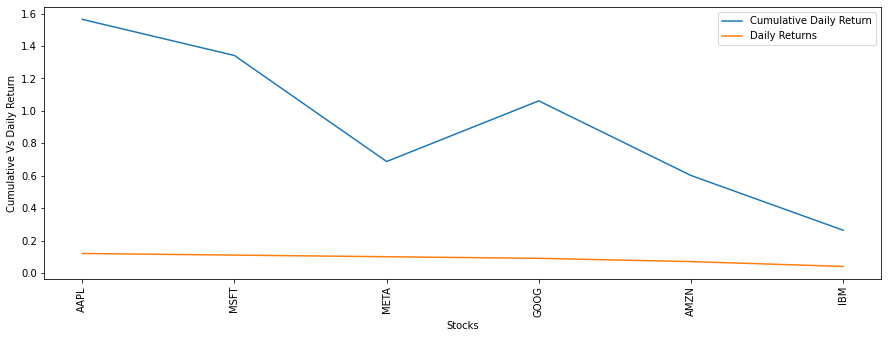

In [55]:
# Line chart showing Cumulative returns of stocks

plt.figure(figsize=(15,5))
sns.lineplot(data=df_final['Cumulative Returns']/100, label="Cumulative Daily Return")
sns.lineplot(data=df_final['Avg Daily Returns'], label="Daily Returns")

# Add label for horizontal axis
plt.xlabel("Stocks")

#rotate the labels
plt.xticks(rotation = 90)

# Add label for horizontal axis
plt.ylabel("Cumulative Vs Daily Return")

plt.show()

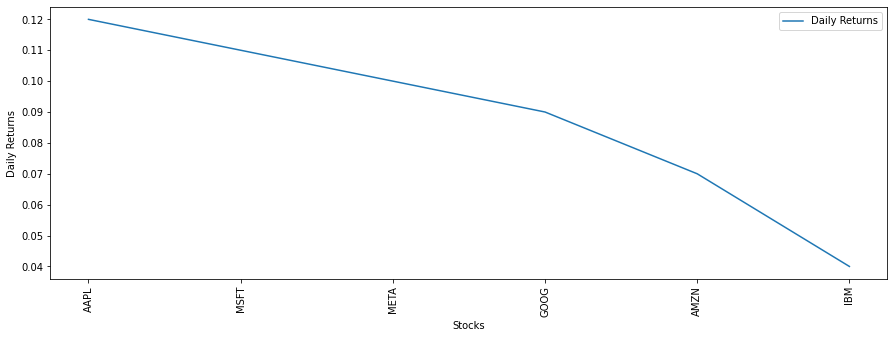

In [56]:
# Line chart showing daily returns of stocks

plt.figure(figsize=(15,5))
sns.lineplot(data=df_final['Avg Daily Returns'], label="Daily Returns")

# Add label for horizontal axis
plt.xlabel("Stocks")

#rotate the labels
plt.xticks(rotation = 90)

# Add label for horizontal axis
plt.ylabel("Daily Returns")

plt.show()

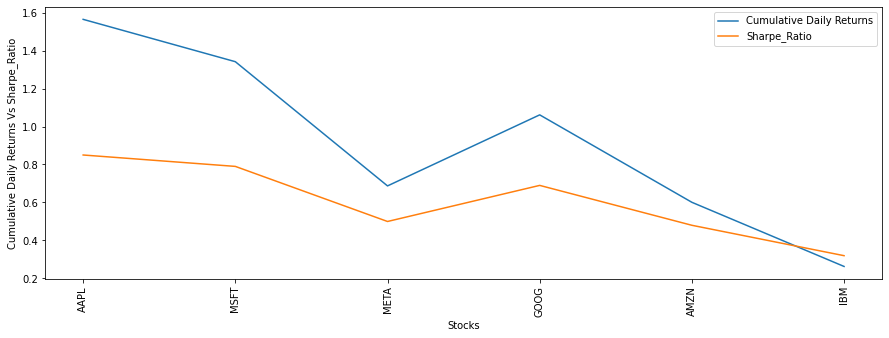

In [57]:
# Line chart showing Cumulative returns of stocks

plt.figure(figsize=(15,5))
sns.lineplot(data=df_final['Cumulative Returns']/100, label="Cumulative Daily Returns")
sns.lineplot(data=df_final['Sharpe_Ratio'], label="Sharpe_Ratio")

# Add label for horizontal axis
plt.xlabel("Stocks")

#rotate the labels
plt.xticks(rotation = 90)

# Add label for horizontal axis
plt.ylabel("Cumulative Daily Returns Vs Sharpe_Ratio")

plt.show()

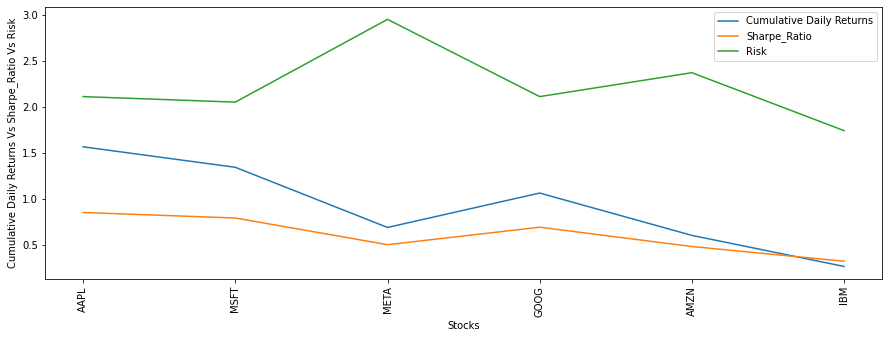

In [58]:
# Line chart showing Cumulative returns of stocks

plt.figure(figsize=(15,5))
sns.lineplot(data=df_final['Cumulative Returns']/100, label="Cumulative Daily Returns")
sns.lineplot(data=df_final['Sharpe_Ratio'], label="Sharpe_Ratio")
sns.lineplot(data=df_final['Risk'], label="Risk")


# Add label for horizontal axis
plt.xlabel("Stocks")

#rotate the labels
plt.xticks(rotation = 90)

# Add label for horizontal axis
plt.ylabel("Cumulative Daily Returns Vs Sharpe_Ratio Vs Risk")

plt.show()

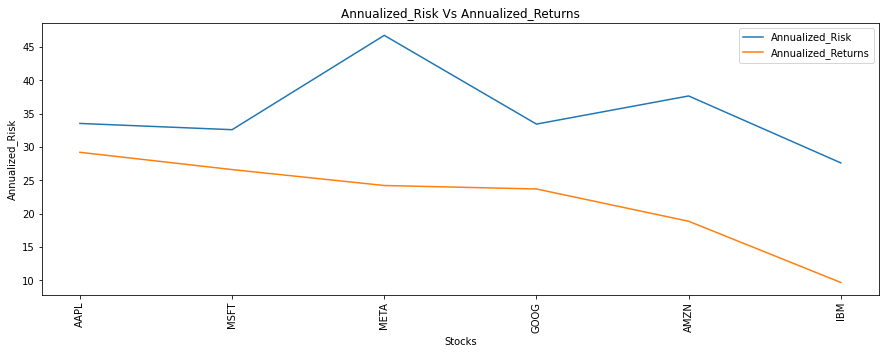

In [59]:
# Line chart showing Cumulative returns of stocks

plt.figure(figsize=(15,5))
sns.lineplot(data=df_final['Annualized_Risk'], label="Annualized_Risk")
sns.lineplot(data=df_final['Annualized_Returns'], label="Annualized_Returns")


# Add label for horizontal axis
plt.xlabel("Stocks")

#rotate the labels
plt.xticks(rotation = 90)

# Add label for horizontal axis
plt.title("Annualized_Risk Vs Annualized_Returns")

plt.show()

#### Mr. James Portfolio

- Mr. James wants to double his investment in the span on 5 years. He wants to invest in low risk stocks which would fetch him decent returns.
- As per his profile Low risk stocks like 'APPL', 'MSFT', 'GOOG' ,'IBM' is suitable to invest on. But overall returns with these three stocks wouldn't reach the target what Mr.Patrick is investing for. So one portion of his wealth can be invested on MSFT to gain the desired returns.
- Lets calculate the Risk and Returns associated with the above mentioned portfolio.

In [62]:
# Initial weight for each stock in order
stocks_data = ['AAPL', 'MSFT', 'GOOG' ,'IBM']

initial_weight_stocks_df = np.array([0.25, 0.25, 0.25, 0.25])

In [63]:
# Lets create a dataset for selected stocks
stocks = original_stocks['01-01-2020':]
portfolio = stocks.copy()
portfolio = portfolio[stocks_data]
portfolio.tail()

,AAPL,MSFT,GOOG,IBM
Date,,,,
2023-12-22,193.600006,374.579987,142.720001,162.139999
2023-12-26,193.050003,374.660004,142.820007,163.210007
2023-12-27,193.149994,374.070007,141.440002,163.460007
2023-12-28,193.580002,375.279999,141.279999,163.750000
2023-12-29,192.529999,376.040009,140.929993,163.550003


In [64]:
# Calculating the daily percentage change:

stocks_returns_daily = portfolio.pct_change()
stocks_returns_daily.head()

,AAPL,MSFT,GOOG,IBM
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,-0.012452,-0.004907,-0.007975
2020-01-06,0.007968,0.002585,0.024657,-0.001787
2020-01-07,-0.004703,-0.009118,-0.000624,0.000671
2020-01-08,0.016086,0.015928,0.007880,0.008346


In [65]:
# let's calculate the avg daily returns:

avg_stocks_daily_returns = stocks_returns_daily.mean()
avg_stocks_daily_returns

AAPL    0.001161
MSFT    0.001058
GOOG    0.000942
IBM     0.000385
dtype: float64

In [66]:
#Calculating Risk of the stocks:

stock_risk= stocks_returns_daily.std()
stock_risk

AAPL    0.021147
MSFT    0.020555
GOOG    0.021080
IBM     0.017415
dtype: float64

In [67]:
# Daily return from the portfolio

stocks_returns_daily['portfolio_daily_return'] = stocks_returns_daily.dot(initial_weight_stocks_df)
stocks_returns_daily.head()

,AAPL,MSFT,GOOG,IBM,portfolio_daily_return
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,-0.012452,-0.004907,-0.007975,-0.008764
2020-01-06,0.007968,0.002585,0.024657,-0.001787,0.008356
2020-01-07,-0.004703,-0.009118,-0.000624,0.000671,-0.003443
2020-01-08,0.016086,0.015928,0.007880,0.008346,0.012060


In [68]:
#Let's calculate the total returns of the portfolio:

allocated_stocks_daily_return = (initial_weight_stocks_df * avg_stocks_daily_returns)

portfolio_return = np.sum(allocated_stocks_daily_return)
portfolio_return*100

0.08865205496621739

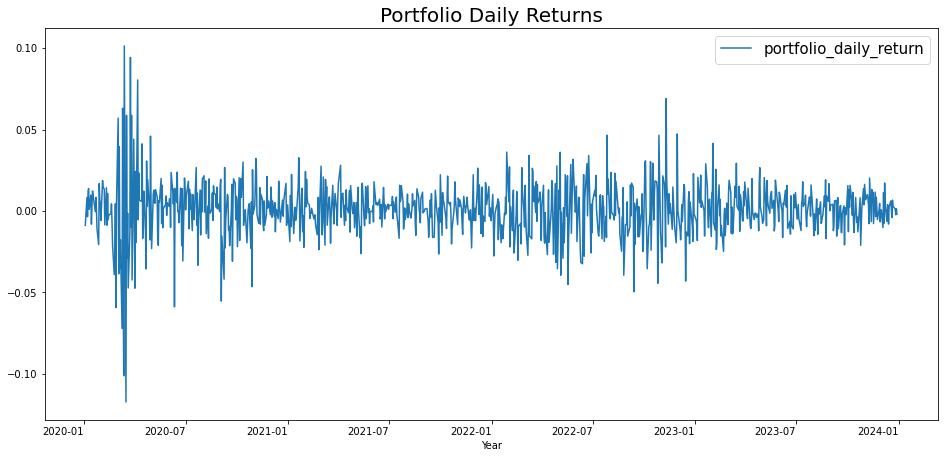

In [69]:
# Lets Plot the graph
plt.figure(figsize=(16,8))
stocks_returns_daily['portfolio_daily_return'].plot()
plt.title('Portfolio Daily Returns', fontsize = 20)
plt.legend(loc = 'best', fontsize = 15)
plt.xticks(rotation=0)
plt.xlabel("Year")
plt.show()

In [70]:
# Cumulative return from the portfolio

daily_cumulative_return = (1+stocks_returns_daily).cumprod()
daily_cumulative_return.tail(5)

,AAPL,MSFT,GOOG,IBM,portfolio_daily_return
Date,,,,,
2023-12-22,2.578325,2.332088,2.087511,1.252388,2.117949
2023-12-26,2.571000,2.332586,2.088974,1.260653,2.120423
2023-12-27,2.572332,2.328913,2.068789,1.262584,2.115552
2023-12-28,2.578059,2.336446,2.066449,1.264824,2.118781
2023-12-29,2.564075,2.341178,2.061329,1.263279,2.115021


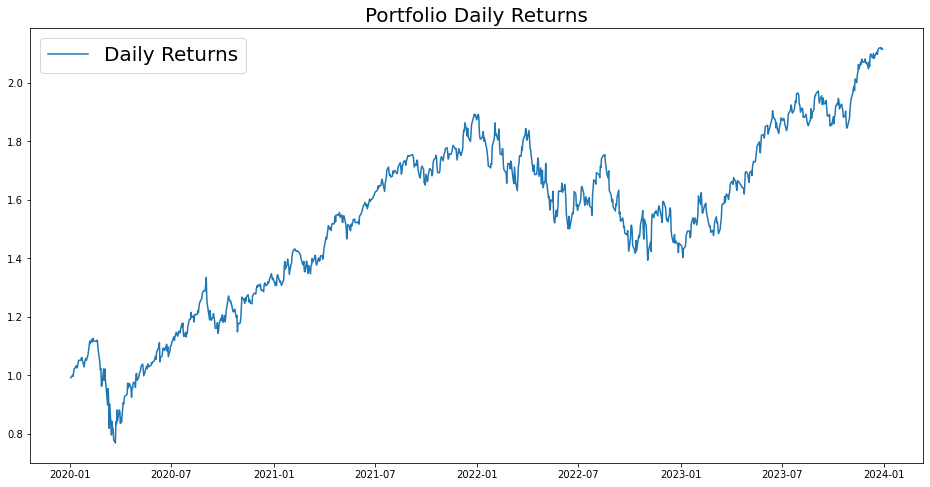

In [71]:
# Lets Plot the graph

plt.figure(figsize=(16,8))
plt.plot(daily_cumulative_return['portfolio_daily_return'], label = 'Daily Returns')
plt.title('Portfolio Daily Returns', fontsize = 20)
plt.legend(loc = 'best', fontsize = 20)
plt.show()

In [72]:
# Covariance matrix for the portfolio
# Removing the last column (Portfolio_Daily_Return) from our calculation.

covariance_matrix_portfolio_s = stocks_returns_daily.iloc[:,:-1]
covariance_matrix_portfolio_s = (covariance_matrix_portfolio_s.cov())*252

covariance_matrix_portfolio_s

,AAPL,MSFT,GOOG,IBM
AAPL,0.112697,0.085088,0.077387,0.040725
MSFT,0.085088,0.106470,0.083954,0.039168
GOOG,0.077387,0.083954,0.111984,0.036956
IBM,0.040725,0.039168,0.036956,0.076431


In [73]:
# Applying the matrix operations mentioned in the image above:

portfolio_variance_s = np.dot(initial_weight_stocks_df.T,np.dot(covariance_matrix_portfolio_s, initial_weight_stocks_df))

In [74]:
# Standard deviation (risk of portfolio):

portfolio_risk_s= np.sqrt(portfolio_variance_s)
portfolio_risk_s*100

26.6239845625513

In [77]:
# calculating the total return on investment:

invested_amount    = 500000
Cummulative_return = daily_cumulative_return['portfolio_daily_return'][-1]
Expected_Return    = round(invested_amount*Cummulative_return,2)
Expected_Earning   = round(Expected_Return-invested_amount,2)
print(f"""Invested Amount : {invested_amount}
         Expected Retunr  : {Expected_Return}
         Expected Earning : {Expected_Earning}""")

Invested Amount : 500000
         Expected Retunr  : 1057510.48
         Expected Earning : 557510.48


### As Mr. James  invests five hundred thousand dollars in equities, the returns he can expect after a Three-year period amount to 1.05 million dollars, resulting in a gain of over five hundred thousand dollars.

#### Mr. James  Portfolio

- Mr. James  on the other hand Consistent with his attitude towards risk, he prefers high-return investments. Believes that he can still bounce back in case of any occasional losses. 
- He Wants to invest 1 million dollar from company's cash and cash equivalents in the most high-margin stocks Expects high returns within 5 years for inorganic expansion of his company. 
- As per his profile High risk/High Returns stocks like AMZN, MSFT,GOOG and AAPL is suitable to invest on. 
- Overall returns with these stocks would fetch him Maximum returns and also cater the Risk.